In [1945]:
# Important Libraries: Part 1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [1186]:
# Importing the data
df = pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

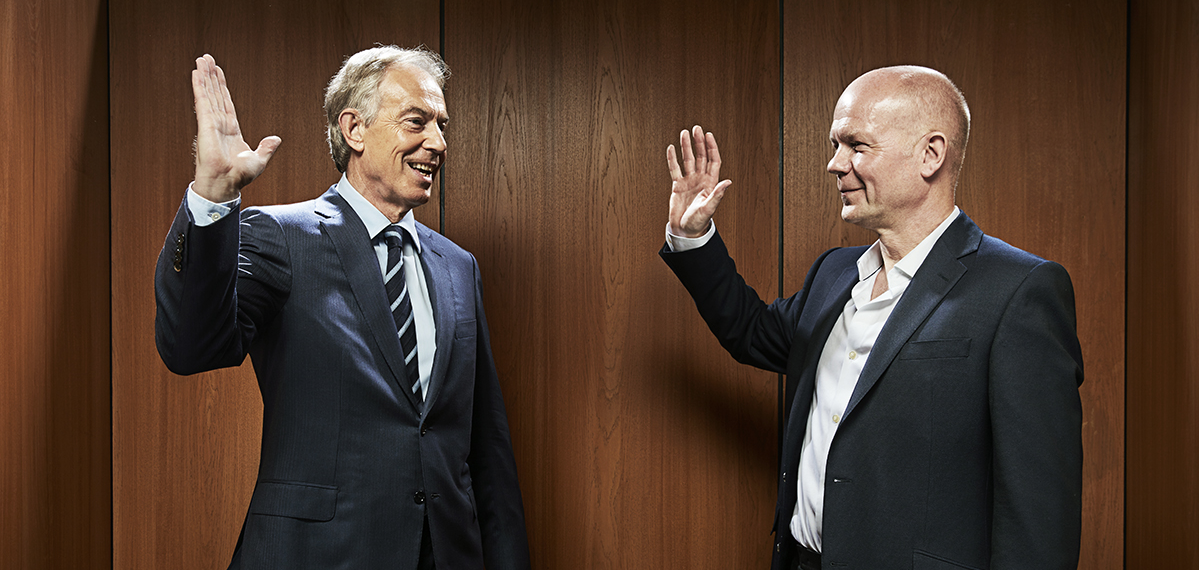

#### 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [1187]:
print('\033[1m' " Over view of first 5 observations")
df.head()

 Over view of first 5 observations


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [1188]:
print('\033[1m' " Number of Rows in the given dataset:",'\033[0m'   , df.shape[0])
print("")
print('\033[1m' " Number of Columns in the given dataset:",'\033[0m' , df.shape[1])

 Number of Rows in the given dataset:  1525

 Number of Columns in the given dataset:  10


In [1189]:
print('\033[1m' " Number of Null values in the given dataset:",'\033[0m')
df.isnull().sum()

 Number of Null values in the given dataset: 


Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [1190]:
print('\033[1m' " Data type check and index check for given dataset:",'\033[0m')
df.info()

 Data type check and index check for given dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [1191]:
# dropping useless columns:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [1192]:
print('\033[1m' " Number of duplicates in the given dataset:",'\033[0m',df.duplicated().sum())

 Number of duplicates in the given dataset:  8


8

In [1946]:
# dropping the duplicates:
df.drop_duplicates(inplace=True)
print('\033[1m' " Number of duplicates after dropping the duplicates:",'\033[0m',df.duplicated().sum())

 Number of duplicates after dropping the duplicates:  0


In [1194]:
# Only age is the continuous variable. All other variables are Discrete/Categorical:

df_num = df['age']

df_cat = df[['vote','economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge','gender']]

In [1214]:
for i in df_cat.columns:
    df_cat[i] = df_cat[i].astype('object')

In [1215]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   economic.cond.national   1517 non-null   object
 2   economic.cond.household  1517 non-null   object
 3   Blair                    1517 non-null   object
 4   Hague                    1517 non-null   object
 5   Europe                   1517 non-null   object
 6   political.knowledge      1517 non-null   object
 7   gender                   1517 non-null   object
dtypes: object(8)
memory usage: 106.7+ KB


#### Unique count of the Categorical variables:

In [1218]:
for i in df_cat.columns:
    print(df_cat[i].value_counts().sort_index())
    print("-----------------------------")

Conservative     460
Labour          1057
Name: vote, dtype: int64
-----------------------------
1     37
2    256
3    604
4    538
5     82
Name: economic.cond.national, dtype: int64
-----------------------------
1     65
2    280
3    645
4    435
5     92
Name: economic.cond.household, dtype: int64
-----------------------------
1     97
2    434
3      1
4    833
5    152
Name: Blair, dtype: int64
-----------------------------
1    233
2    617
3     37
4    557
5     73
Name: Hague, dtype: int64
-----------------------------
1     109
2      77
3     128
4     126
5     123
6     207
7      86
8     111
9     111
10    101
11    338
Name: Europe, dtype: int64
-----------------------------
0    454
1     38
2    776
3    249
Name: political.knowledge, dtype: int64
-----------------------------
female    808
male      709
Name: gender, dtype: int64
-----------------------------


#### Data Summary : Continuous:

In [1212]:
pd.DataFrame(df_num.describe()).T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0


#### Data Summary : Categorical:

In [1216]:
pd.DataFrame(df_cat.describe(include='object')).T

,count,unique,top,freq
vote,1517,2,Labour,1057
economic.cond.national,1517,5,3,604
economic.cond.household,1517,5,3,645
Blair,1517,5,4,833
Hague,1517,5,2,617
Europe,1517,11,11,338
political.knowledge,1517,4,2,776
gender,1517,2,female,808


#### Outliers:
1. Very less people have assessed the current national economic and household economic condition less than 2.
2. Ratings less than 2 are shown as outliers.
3. As these are categories and not a wrong entry the outliers are not removed.

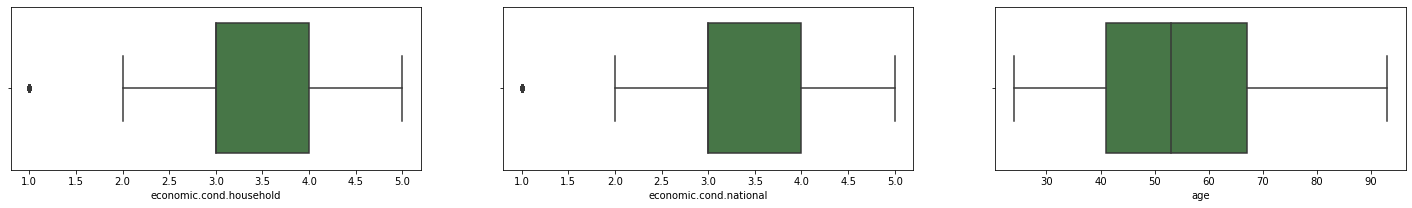

In [2069]:
plt.figure(figsize=(25,3))
plt.subplot(1,3,1)
sns.boxplot(x=df['economic.cond.household'],palette='nipy_spectral',saturation=.25)
plt.subplot(1,3,2)
sns.boxplot(x=df['economic.cond.national'],palette='nipy_spectral',saturation=.25)
plt.subplot(1,3,3)
sns.boxplot(x=df['age'],palette='nipy_spectral',saturation=.25)
plt.show()

#### Skewness and Kurtosis:

In [1233]:
print('\033[1m' " Skewness for Age:" '\033[0m', round(df['age'].skew(),3))
print('\033[1m' " Kurtosis for Age:" '\033[0m', round(df['age'].kurt(),3))
print('\033[1m' " The Coefficient of Variance for Age:" '\033[0m',round(df['age'].std()/df['age'].mean()*100,3))

 Skewness for Age: 0.14
 Kurtosis for Age: -0.944
 The Coefficient of Variance for Age: 28.948


#### Data Summary:
1. No null values in the given data.
2. 8 duplicates dropped.
3. No anomalies in the data.
4. No outliers in the age column.
5. The skewness for the age variable is 0.14 and it is symmetrical.
6. The kurtosis for the age is very less. Which means no outliers and the distribution is flat and has thin tails
7. the coefficient of variance is 29%. Lesser the CV% the feature has better stability.

#### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. 

#### Data Visualization: Uni-variate analysis: Age

Mean age of people for both the parties :
vote
Conservative    56.841304
Labour          53.109745
Name: age, dtype: float64

Histogram and Box-plot representation for Age Column :


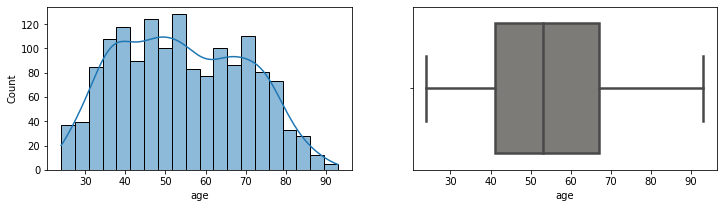

In [2088]:
print('\033[1m' "Mean age of people for both the parties :" '\033[0m')
print(df.groupby('vote')['age'].mean())
print("")
print('\033[1m' "Histogram and Box-plot representation for Age Column :" '\033[0m')
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.histplot(x=df['age'],kde=True,bins=20)
plt.subplot(1,2,2)
sns.boxplot(x=df['age'],saturation=2,whis=2,linewidth=2.5,palette='cividis_r',orient='v')
plt.show()

#### Pie plot representation for vote and gender:

Pie plot representation for Vote and Gender feature


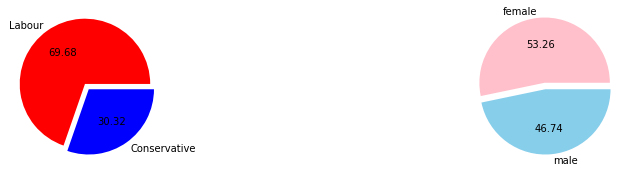

In [2554]:
print('\033[1m''Pie plot representation for Vote and Gender feature''\033[0m')
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.pie(df['vote'].value_counts(),autopct='%.2f',labels = df['vote'].
        value_counts().index,explode=(0.1,0),colors=['red','blue'])
plt.subplot(1,2,2)
plt.pie(df['gender'].value_counts(),autopct='%.2f',labels = df['gender'].
        value_counts().index,explode=(0.1,0),colors=['pink','skyblue'])
plt.show()


#### Uni-variate analysis: Categorical

In [2143]:
def Uni_Cat(column):
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    print(" ")
    print('\033[1m',"Strip-plot and Count-plot for the " +column,"column",'\033[0m')
    sns.stripplot(x=df_cat[i],y=df['age'],palette='Dark2',jitter=True,edgecolor='k')
    plt.xlabel(column)
    
    plt.subplot(1,2,2)
    sns.countplot(y=df_cat[column],palette='ocean')
    plt.tight_layout()
    plt.show()

 
 Strip-plot and Count-plot for the vote column 


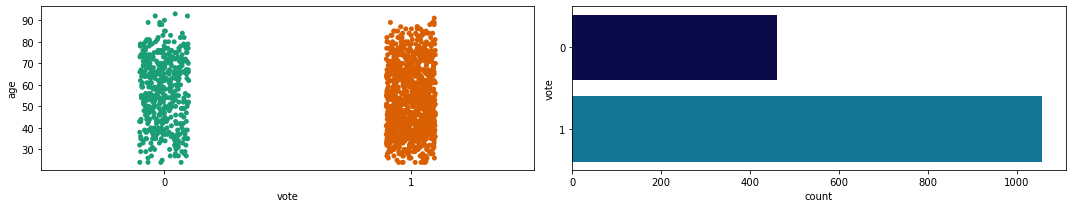

 
 Strip-plot and Count-plot for the economic.cond.national column 


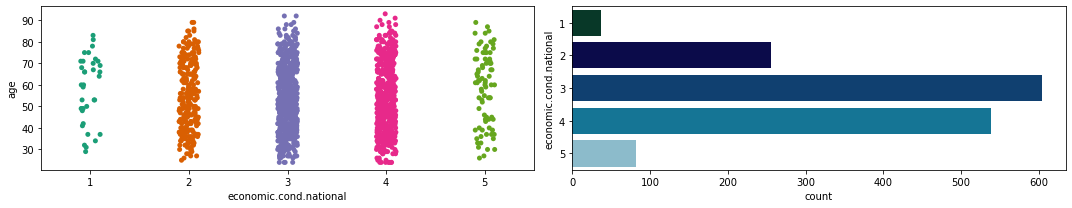

 
 Strip-plot and Count-plot for the economic.cond.household column 


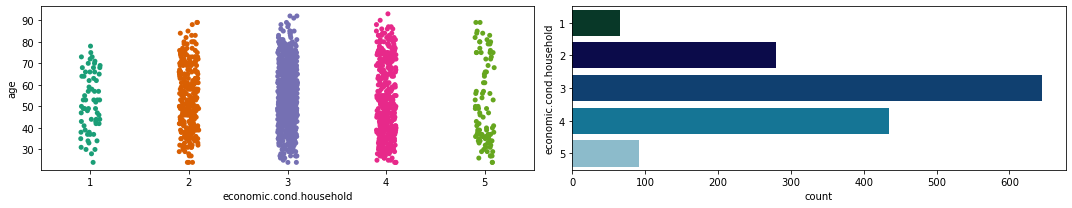

 
 Strip-plot and Count-plot for the Blair column 


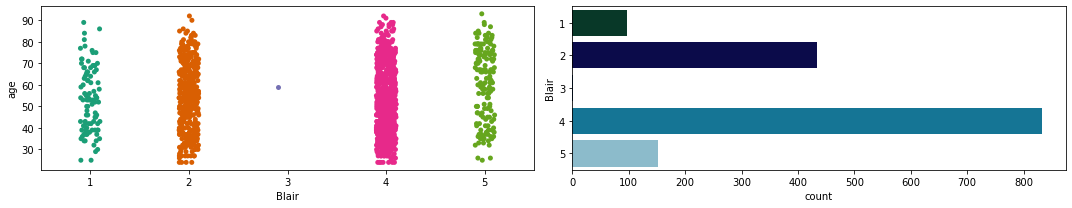

 
 Strip-plot and Count-plot for the Hague column 


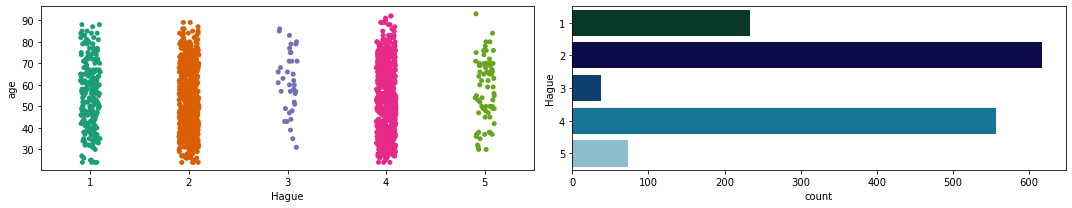

 
 Strip-plot and Count-plot for the Europe column 


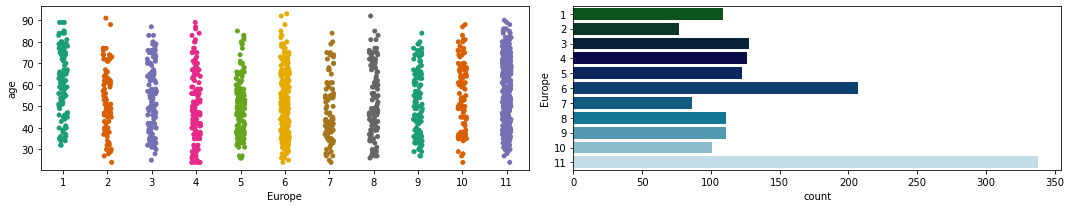

 
 Strip-plot and Count-plot for the political.knowledge column 


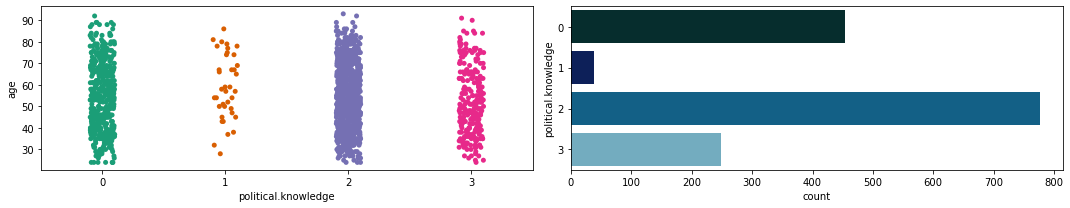

 
 Strip-plot and Count-plot for the gender column 


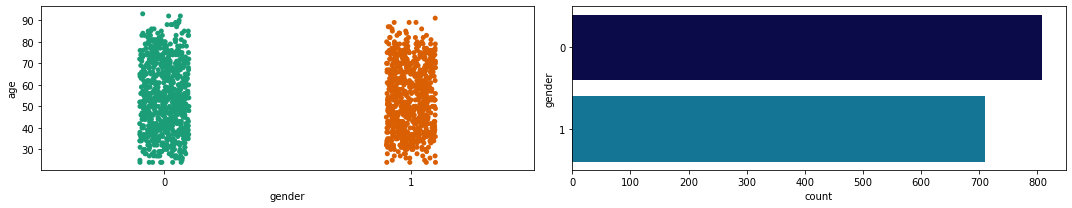

In [2144]:
for i in df_cat:
    Uni_Cat(i)

#### Univariate analysis Interpretation:
1. The mean age for the people voted for Labour is 53 and the mean age for the people who voted for conservative party is 56.
2. 75% of the people who have voted are aged below 70.
3. The target variable is found to be imbalanced. For the given problem SMOTE technique is used to over sample the minority class and results are compared with the original data. 
4. The assessment for national economic conditions and household conditions follow similar pattern. Most common ratings are 2,3 and 4.
5. The assessment of leaders also have a similar pattern. Voters did not express Neutral opinions. The voters have strongly expressed their opinions towards leaders.
6. 22% of the voters have 'Eurosceptic' sentiment. 13% of the voters showed neutral opinion towards European integration.
7. Almost equal number of male and female voters are found.

#### Bi-variate Analysis:

1. The correlation heatmap can be used only for numerical/ continuous columns.
2. In the given data set we only  have age as continuous variable.
3. To find the relationship between the target and the predictor (categorical) variables, chi square test is used.
4. Assumption(H0): The two columns are NOT related to each other.
5. If p value is less than 0.05 we reject the Null hypothesis and prove that the predictor variable is related to the target variable.

In [1445]:
from scipy.stats import chi2_contingency

chi2, pval_eco_household, dof, expected = chi2_contingency(pd.crosstab(df['vote'],df['economic.cond.household']))
chi2, pval_eco_national, dof, expected = chi2_contingency(pd.crosstab(df['vote'],df['economic.cond.national']))
chi2, pval_blair, dof, expected = chi2_contingency(pd.crosstab(df['vote'],df['Blair']))
chi2, pval_hague, dof, expected = chi2_contingency(pd.crosstab(df['vote'],df['Hague']))
chi2, pval_europe, dof, expected = chi2_contingency(pd.crosstab(df['vote'],df['Europe']))
chi2, pval_political, dof, expected = chi2_contingency(pd.crosstab(df['vote'],df['political.knowledge']))
chi2, pval_gender, dof, expected = chi2_contingency(pd.crosstab(df['vote'],df['gender']))

In [1947]:
pvalue = {pval_eco_household:'Eco_household',pval_eco_national:'Eco_national',
          pval_blair : 'Blair',pval_hague :'Hague' ,pval_europe : 'Europe', 
          pval_political: 'Political_know',pval_gender: 'gender'}

for i in pvalue:
    if i < 0.05:
        print('Pvalue is < 0.05'' The discrete variable {}'.format(pvalue[i]), 'is a good predictor')
    else:
         print('Pvalue is > 0.05'' The discrete variable {}'.format(pvalue[i]), 'not a good predictor')

Pvalue is < 0.05 The discrete variable Eco_household is a good predictor
Pvalue is < 0.05 The discrete variable Eco_national is a good predictor
Pvalue is < 0.05 The discrete variable Blair is a good predictor
Pvalue is < 0.05 The discrete variable Hague is a good predictor
Pvalue is < 0.05 The discrete variable Europe is a good predictor
Pvalue is < 0.05 The discrete variable Political_know is a good predictor
Pvalue is > 0.05 The discrete variable gender not a good predictor


#### Chi Square contingency Value interpretation:
1. Except the variable 'gender' all other categorical variables are good predictors.
2. Relationship between predictors and target is required to have good output.
3. Pvalues for Economic cond national, Hague, Blair and Europe are very less. Lesser the pvalue stronger the relationship is.

4. The weights/importance of each variable can be checked Logistic regression and LDA model.

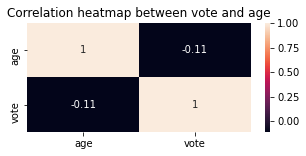

In [2555]:
# Correlation plot for continuous and categorica; variable --> Heat map between Age and Vote

df1 = df_new[['age','vote']]
plt.figure(figsize=(5,2))
plt.title('Correlation heatmap between vote and age')
sns.heatmap(df1.corr(),annot=True)
plt.show()

  Bivariate Analysis: Pairplot 


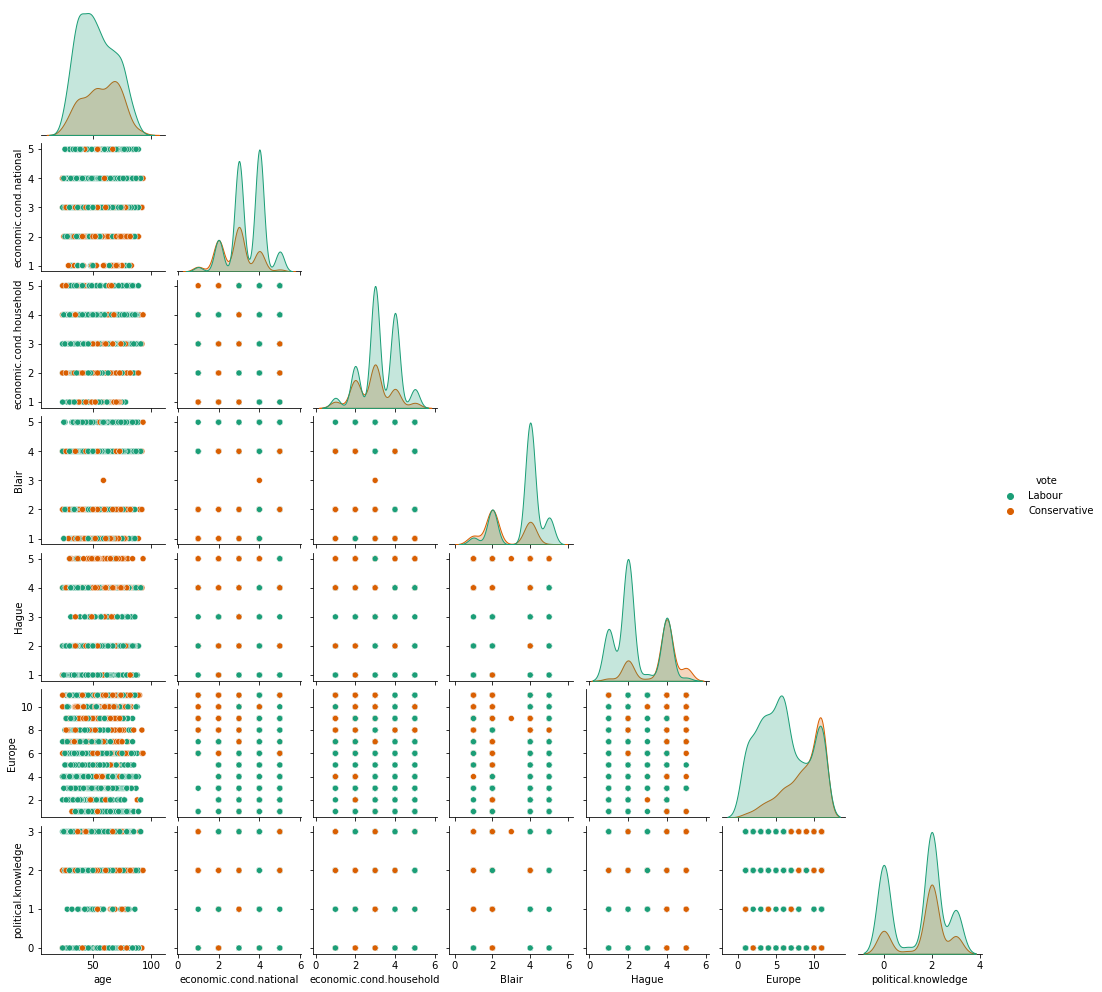

In [2153]:
# Pair plot
print('\033[1m'," Bivariate Analysis: Pairplot",'\033[0m')

sns.pairplot(data = df,hue='vote',corner=True,diag_kind='kde',palette='Dark2',height=2)
plt.show()

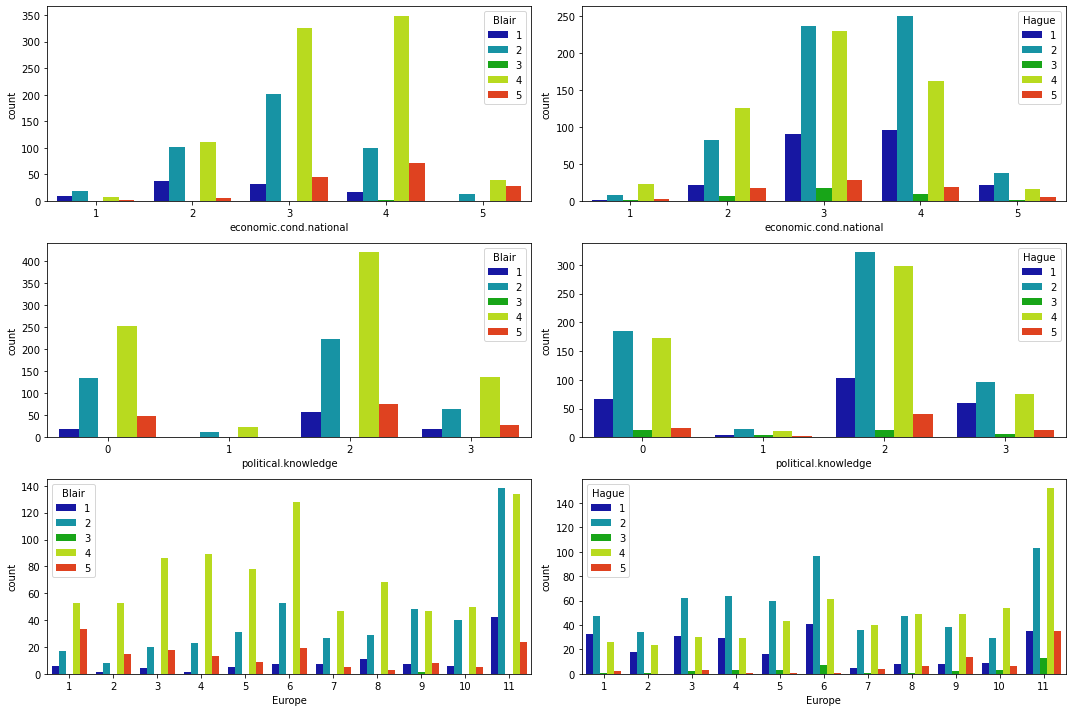

In [2020]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.countplot(x=df_cat['economic.cond.national'],hue=df_cat['Blair'],palette='nipy_spectral')
plt.subplot(3,2,2)
sns.countplot(x=df_cat['economic.cond.national'],hue=df_cat['Hague'],palette='nipy_spectral')
plt.subplot(3,2,3)
sns.countplot(x=df_cat['political.knowledge'],hue=df_cat['Blair'],palette='nipy_spectral')
plt.subplot(3,2,4)
sns.countplot(x=df_cat['political.knowledge'],hue=df_cat['Hague'],palette='nipy_spectral')
plt.subplot(3,2,5)
sns.countplot(x=df_cat['Europe'],hue=df_cat['Blair'],palette='nipy_spectral')
plt.subplot(3,2,6)
sns.countplot(x=df_cat['Europe'],hue=df_cat['Hague'],palette='nipy_spectral')
plt.tight_layout()
plt.show()

#### Bi-variate Analysis Interpretation:
1. Voters who have rated Blair above 3 have expressed that there is good national economic condition. More number of voters have given 4 and above ratings.
2. More number of Voters who have rated Hague above 3 have expressed is neutral opinions towards national economic condition.
3. Blair: In national economic condition where the rating is more than 3, larger proportion of voters have rated Blair more than 
4. Hague: In national economic condition where the rating is more than 3, larger proportion of voters have given 2 ratings to Hague.
5. Voters believe that Blair has stronger political knowledge on European integration.
6. Voters with high Eurosceptic attitude (11) prefer Hague. 
* In the 5th subplot, from 1 to 6 i.e., voters who show negative attitude towards European integration have rated Blair above 4 frequently. From 6 to 11, there are high number of 2-ratings for Blair. 
* In the 6th subplot, from 1 to 6 i.e., voters who show negative attitude towards European integration, have given more number of 2i ratings to Hague. From 6 to 11 i.e., towards high Eurosceptic attitude, ratings for Hague is in increasing trend.

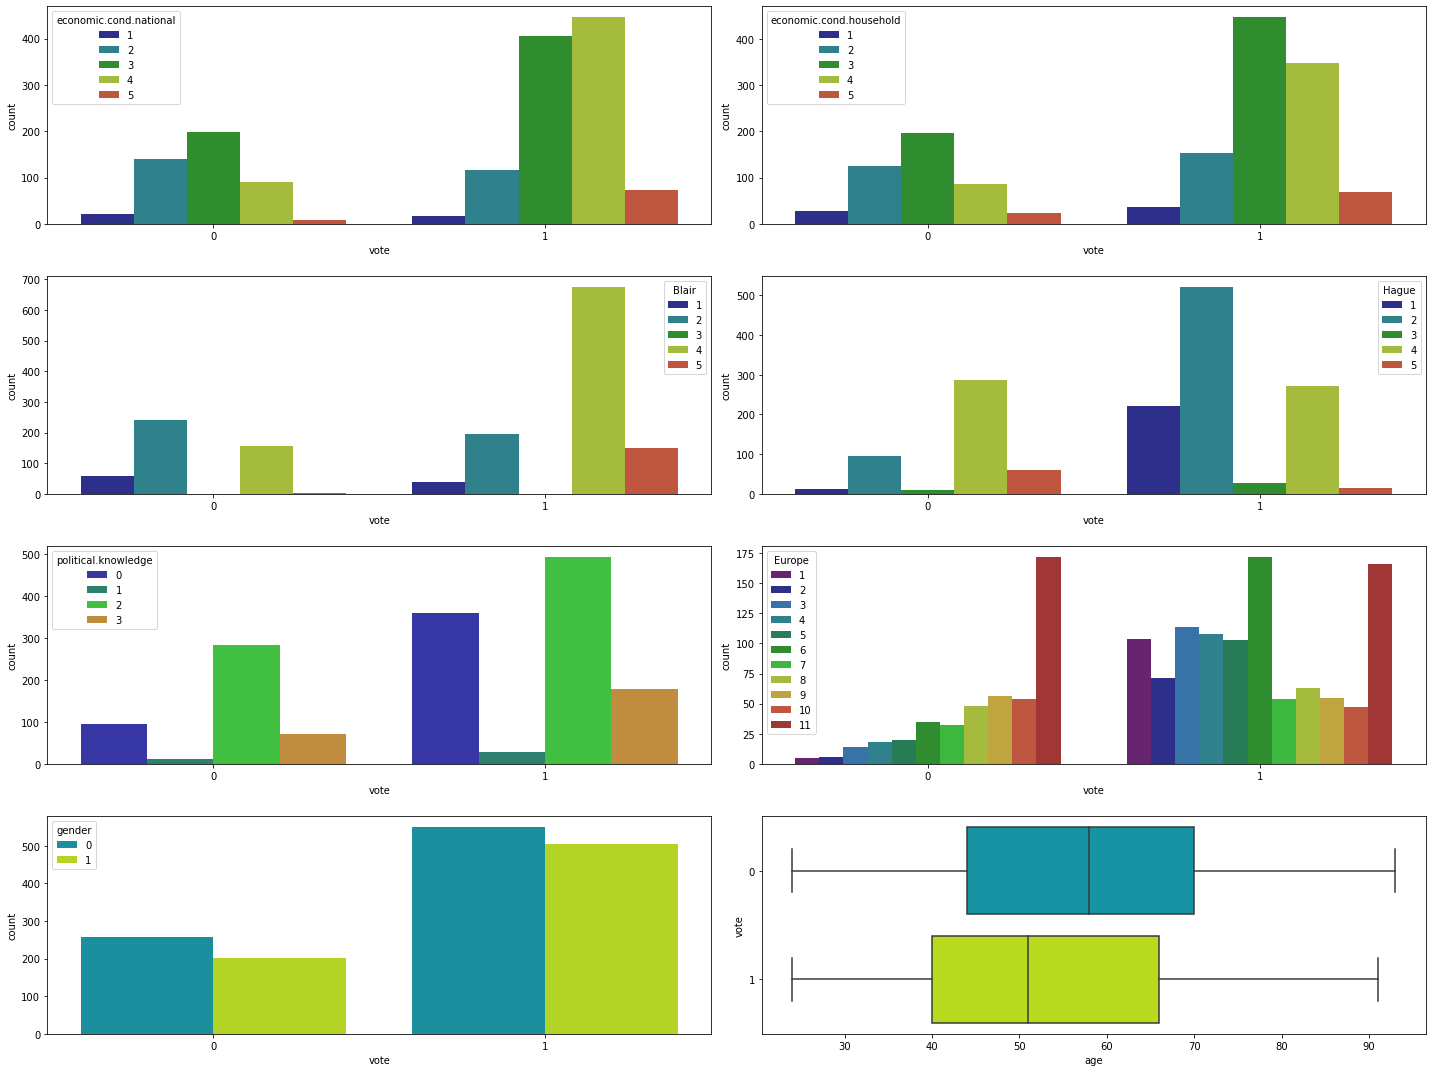

In [2044]:
plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.countplot(x=df_cat['vote'],hue=df_cat['economic.cond.national'],palette='nipy_spectral',saturation=.50)
plt.subplot(4,2,2)
sns.countplot(x=df_cat['vote'],hue=df_cat['economic.cond.household'],palette='nipy_spectral',saturation=.50)
plt.subplot(4,2,3)
sns.countplot(x=df_cat['vote'],hue=df_cat['Blair'],palette='nipy_spectral',saturation=.50)
plt.subplot(4,2,4)
sns.countplot(x=df_cat['vote'],hue=df_cat['Hague'],palette='nipy_spectral',saturation=.50)
plt.subplot(4,2,5)
sns.countplot(x=df_cat['vote'],hue=df_cat['political.knowledge'],palette='nipy_spectral',saturation=.50)
plt.subplot(4,2,6)
sns.countplot(x=df_cat['vote'],hue=df_cat['Europe'],palette='nipy_spectral',saturation=.50)
plt.subplot(4,2,7)
sns.countplot(x=df_cat['vote'],hue=df_cat['gender'],palette='nipy_spectral',saturation=.70)
plt.subplot(4,2,8)
sns.boxplot(x=df['age'],y=df_cat['vote'],palette='nipy_spectral',orient='h',dodge=True,linewidth=1.5)
plt.tight_layout()
plt.show()

#### Bi-variate Analysis Interpretation:
1. Voters of Labour party have high ratings for assessment of current national economic and household economic.
2. High ratings for Blair are from Voters of Labour party. 
3. Similar trend between Class 1 and 0 is found for Political knowledge feature. In both the classes, more number of voters have rated their leaders 2 in a scale of 0 to 3.
4. The voters of conservative party are more Eurosceptic.Whereas voters of Blair have more neutral opinions along with high Eurosceptic attitude.
5. No clear discrimination between genders in selection of party.
6. The median age is little higher for the voters of conservative party.

#### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

In [1366]:
# Converting the Categories to Codes (Vote and Gender)
df_cat['vote'] = pd.Categorical(df_cat['vote']).codes
df_cat['gender'] = pd.Categorical(df_cat['gender']).codes

In [1374]:
# 1 - Labour and 0 - Conservative

df_cat['vote'].value_counts()

1    1057
0     460
Name: vote, dtype: int64

In [1368]:
for i in df_cat.columns:
    df_cat[i] = df_cat[i].astype('int64')

In [1369]:
# Concatenating numerical and discrete
df_new = pd.concat([df_num,df_cat],axis=1)

In [1373]:
# Over view of the data before modelling
df_new.head()

,age,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43,1,3,3,4,1,2,2,0
1,36,1,4,4,4,4,5,2,1
2,35,1,4,4,5,2,3,2,1
3,24,1,4,2,2,1,4,0,0
4,41,1,2,2,1,1,6,2,1


### Libraries for Modelling: -->

In [2350]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix,log_loss,f1_score,balanced_accuracy_score
from sklearn.model_selection import cross_val_score,KFold

#### Data split (70:30)

In [2270]:
df_new.shape

(1517, 9)

In [2271]:
# split:
X = df_new[['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']]

y = df_new['vote']

In [2272]:
y.shape

(1517,)

In [1391]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=1,stratify=y)

In [2159]:
vif_data = df_new.iloc[:,1:]
vif_data = pd.DataFrame(MM.fit_transform(vif_data),columns=vif_data.columns)

In [2565]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_new.iloc[:,1:].values, i) 
                      for i in range(df_new.iloc[:,1:].shape[1])]
vif["features"] = df_new.iloc[:,1:].columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
1,16.187213,economic.cond.national
2,13.042505,economic.cond.household
3,11.097118,Blair
4,6.083224,Hague
5,4.998339,Europe
0,4.882768,vote
6,2.898139,political.knowledge
7,1.932681,gender


In [2160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(vif_data.values, i) 
                      for i in range(vif_data.shape[1])]
vif["features"] = vif_data.columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
1,8.632618,economic.cond.national
2,6.777038,economic.cond.household
3,6.223918,Blair
0,4.513125,vote
5,3.561292,Europe
4,3.205943,Hague
6,2.728073,political.knowledge
7,1.922235,gender


In [2563]:
print('\033[1m''Standard Deviation''\033[0m',)
df_new.std()

Standard Deviation


age                        15.701741
vote                        0.459805
economic.cond.national      0.881792
economic.cond.household     0.931069
Blair                       1.174772
Hague                       1.232479
Europe                      3.299043
political.knowledge         1.084417
gender                      0.499099
dtype: float64

In [2562]:
print('\033[1m''Variance''\033[0m',)
df_new.var()

Variance


age                        246.544655
vote                         0.211421
economic.cond.national       0.777558
economic.cond.household      0.866890
Blair                        1.380089
Hague                        1.519005
Europe                      10.883687
political.knowledge          1.175961
gender                       0.249099
dtype: float64

#### Reasons for Scaling:
1. Except age all other columns are categorical. Age column can get higher weightage.
2. Normalizing the data using Min Max Scaler from Sklearn will bring all the data points within 0-1 range.
3. The VIF scores on unscaled data is higher than the VIF scores of normalized data.
4. The standard deviation and variane for Age is higher than other variables.
5. Hence, for modelling scaled data is used.

In [1386]:
MM = MinMaxScaler()

In [1392]:
# Using Min Max Scaler the data is normalized

x_train = pd.DataFrame(MM.fit_transform(X_train),columns=X_train.columns)

x_test = pd.DataFrame(MM.transform(X_test),columns=X_test.columns)


In [2269]:
print('Shape of the traning data:',x_train.shape[0])
print('Shape of the traning data:',y_train.shape[0])
print('Shape of the testing data:',x_test.shape[0])
print('Shape of the testing data:',y_test.shape[0])

Shape of the traning data: 1061
Shape of the traning data: 1061
Shape of the testing data: 456
Shape of the testing data: 456


#### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)
#### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

#### Logistic Regression, LDA, Naiver Bayes and KNN

In [2276]:
LR = LogisticRegression().fit(x_train,y_train)
LDA = LinearDiscriminantAnalysis().fit(x_train,y_train)
NB = GaussianNB().fit(x_train,y_train)
KNN = KNeighborsClassifier().fit(x_train,y_train)

Models = {NB: 'Naive_Bayes', KNN: 'KNN',LR: 'Logistic_Regression',LDA:'LDA'}
for i in Models:
    print('\033[1m''Accuracy Score_Train: ''\033[0m' '{} model'.format(Models[i]), 
          round(i.score(x_train,y_train),3),'\033[1m' '|' ' Accuracy Score_Test: ''\033[0m' '{} model'.
          format(Models[i]),round(i.score(x_test,y_test),3))

Accuracy Score_Train: Naive_Bayes model 0.82 | Accuracy Score_Test: Naive_Bayes model 0.857
Accuracy Score_Train: KNN model 0.868 | Accuracy Score_Test: KNN model 0.844
Accuracy Score_Train: Logistic_Regression model 0.827 | Accuracy Score_Test: Logistic_Regression model 0.851
Accuracy Score_Train: LDA model 0.823 | Accuracy Score_Test: LDA model 0.853


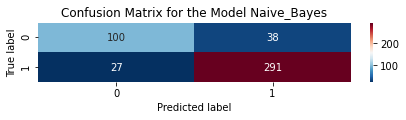

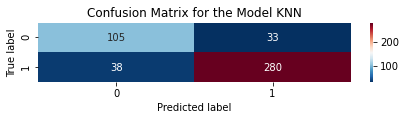

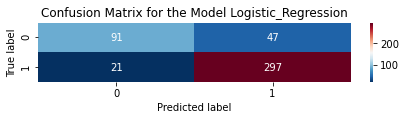

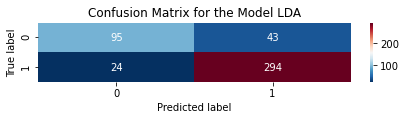

In [2234]:
Models = {NB: 'Naive_Bayes', KNN: 'KNN',LR: 'Logistic_Regression',LDA:'LDA'}

for i in Models:
    plt.figure(figsize=(7,5))   
    plt.subplot(4,1,1)    
    plt.title('Confusion Matrix for the Model {}'. format(Models[i]))
    sns.heatmap((confusion_matrix(y_test,i.predict(x_test))),annot=True,fmt='.5g',cmap='RdBu_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
        

In [2214]:
Models = {NB: 'Naive_Bayes', KNN: 'KNN',LR: 'Logistic_Regression',LDA:'LDA'}
for i in Models:
    print('\033[1m''Classification Report for {} model on Test_Data''\033[0m'.format(Models[i]))    
    print(classification_report(y_test,i.predict(x_test)))    
    print('-----------------------------------------------------------------')

Classification Report for Naive_Bayes model on Test_Data
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456

-----------------------------------------------------------------
Classification Report for KNN model on Test_Data
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       138
           1       0.89      0.88      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.82      0.82       456
weighted avg       0.85      0.84      0.85       456

-----------------------------------------------------------------
Classification Report for Logistic_Regression model on Test_Data
              precision    recall  f1-score

#### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

#### Modal Tuning: Naive Bayes

In [2538]:
Model_NB = GaussianNB()
Model_NB.fit(x_train,y_train)

# Evaluation metrics (Train and Test)

NB_Score_Train = Model_NB.score(x_train,y_train)
NB_Roc_Score_Train = roc_auc_score(y_train,Model_NB.predict_proba(x_train)[:,1])
NB_F1Score_Train = f1_score(y_train, Model_NB.predict(x_train))
NB_Log_loss_Train = log_loss(y_train, Model_NB.predict(x_train))

NB_Score_Test = Model_NB.score(x_test,y_test)
NB_Roc_Score_Test = roc_auc_score(y_test,Model_NB.predict_proba(x_test)[:,1])
NB_F1Score_Test = f1_score(y_test, Model_NB.predict(x_test))
NB_Log_loss_Test = log_loss(y_test, Model_NB.predict(x_test))

Model_Metric = pd.DataFrame(index=['Accuracy','Roc_Score','F1_Score','Log_Loss'])
Model_Metric['NB_Train'] = [NB_Score_Train,NB_Roc_Score_Train,NB_F1Score_Train,NB_Log_loss_Train]
Model_Metric['NB_Test'] = [NB_Score_Test,NB_Roc_Score_Test,NB_F1Score_Test,NB_Log_loss_Test]
round(Model_Metric,3)

,NB_Train,NB_Test
Accuracy,0.820,0.857
Roc_Score,0.873,0.912
F1_Score,0.871,0.900
Log_Loss,6.218,4.923


#### Logistic Regression:

In [2539]:
Param_grid = {'max_iter': [500,1000,2000],
             'penalty' : ['l1','l2'],
             'solver' : ['newton-cg','sag','liblinear','lbfgs','saga'],
             'C' : [0.5,0.8,1.0]}
Grid_search_LR = GridSearchCV(LogisticRegression(random_state=1),param_grid=Param_grid,cv=5)
Grid_search_LR.fit(x_train,y_train)
Model_LR = Grid_search_LR.best_estimator_
print(Grid_search_LR.best_params_)
print('Grid_search_KNN: Score_Train', Model_LR.score(x_train,y_train),
      'Grid_search_KNN: Score_Test',Model_LR.score(x_test,y_test))

{'C': 0.8, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
Grid_search_KNN: Score_Train 0.8303487276154571 Grid_search_KNN: Score_Test 0.8508771929824561


In [2540]:
Model_LR.fit(x_train, y_train)

# Evaluation metrics (Train and Test)

LR_Score_Train = Model_LR.score(x_train,y_train)
LR_Roc_Score_Train = roc_auc_score(y_train,Model_LR.predict_proba(x_train)[:,1])
LR_F1Score_Train = f1_score(y_train, Model_LR.predict(x_train))
LR_Log_loss_Train = log_loss(y_train, Model_LR.predict(x_train))

LR_Score_Test = Model_LR.score(x_test,y_test)
LR_Roc_Score_Test = roc_auc_score(y_test,Model_LR.predict_proba(x_test)[:,1])
LR_F1Score_Test = f1_score(y_test, Model_LR.predict(x_test))
LR_Log_loss_Test = log_loss(y_test, Model_LR.predict(x_test))

Model_Metric['LR_Train'] = [LR_Score_Train,LR_Roc_Score_Train,LR_F1Score_Train,LR_Log_loss_Train]
Model_Metric['LR_Test'] = [LR_Score_Test,LR_Roc_Score_Test,LR_F1Score_Test,LR_Log_loss_Test]
round(Model_Metric,3)

,NB_Train,NB_Test,LR_Train,LR_Test
Accuracy,0.820,0.857,0.830,0.851
Roc_Score,0.873,0.912,0.877,0.911
F1_Score,0.871,0.900,0.882,0.897
Log_Loss,6.218,4.923,5.860,5.151


#### Linear Discriminant Analysis

In [2541]:
Param_grid = {'tol': [0.001,0.0001,0.0001],
             'solver' : ['svd', 'lsqr', 'eigen']}
Grid_search_LDA = GridSearchCV(LinearDiscriminantAnalysis(),param_grid=Param_grid,cv=5)
Grid_search_LDA.fit(x_train,y_train)
Model_LDA = Grid_search_LDA.best_estimator_
print(Grid_search_LDA.best_params_)
print('Grid_search_KNN: Score_Train', Model_LDA.score(x_train,y_train),
      'Grid_search_KNN: Score_Test',Model_LDA.score(x_test,y_test))

{'solver': 'svd', 'tol': 0.001}
Grid_search_KNN: Score_Train 0.822808671065033 Grid_search_KNN: Score_Test 0.8530701754385965


In [2542]:
Model_LDA.fit(x_train, y_train)
# Evaluation metrics (Train and Test)

LDA_Score_Train = Model_LDA.score(x_train,y_train)
LDA_Roc_Score_Train = roc_auc_score(y_train,Model_LDA.predict_proba(x_train)[:,1])
LDA_F1Score_Train = f1_score(y_train, Model_LDA.predict(x_train))
LDA_Log_loss_Train = log_loss(y_train, Model_LDA.predict(x_train))

LDA_Score_Test = Model_LDA.score(x_test,y_test)
LDA_Roc_Score_Test = roc_auc_score(y_test,Model_LDA.predict_proba(x_test)[:,1])
LDA_F1Score_Test = f1_score(y_test, Model_LDA.predict(x_test))
LDA_Log_loss_Test = log_loss(y_test, Model_LDA.predict(x_test))

Model_Metric['LDA_Train'] = [LDA_Score_Train,LDA_Roc_Score_Train,LDA_F1Score_Train,LDA_Log_loss_Train]
Model_Metric['LDA_Test'] = [LDA_Score_Test,LDA_Roc_Score_Test,LDA_F1Score_Test,LDA_Log_loss_Test]
round(Model_Metric,3)

,NB_Train,NB_Test,LR_Train,LR_Test,LDA_Train,LDA_Test
Accuracy,0.820,0.857,0.830,0.851,0.823,0.853
Roc_Score,0.873,0.912,0.877,0.911,0.877,0.914
F1_Score,0.871,0.900,0.882,0.897,0.875,0.898
Log_Loss,6.218,4.923,5.860,5.151,6.120,5.075


#### K Nearest Neighbour:

In [2543]:
acc_scores = []

for k in np.arange(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    scores = knn.score(x_test,y_test)
    acc_scores.append(scores)
    
MCE = [1-x for x in acc_scores]
MCE

[0.2171052631578947,
 0.16885964912280704,
 0.1557017543859649,
 0.1600877192982456,
 0.14912280701754388,
 0.13815789473684215,
 0.14912280701754388,
 0.14692982456140347,
 0.14473684210526316,
 0.13815789473684215,
 0.14254385964912286,
 0.15131578947368418,
 0.1578947368421053,
 0.1578947368421053,
 0.1578947368421053]

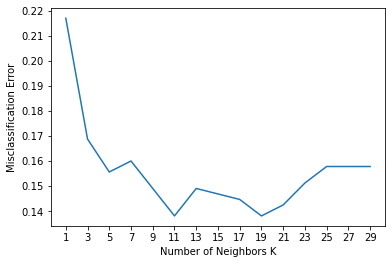

In [2544]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,30,2), MCE)
plt.xticks(np.arange(1,30,2))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [2545]:
Param_grid = {'n_neighbors': [11,19],              
             'weights' : ['uniform','distance'],
             'p' : [1,2],
             'algorithm' : ['ball_tree', 'kd_tree', 'brute']            
         }
Grid_search_KNN = GridSearchCV(KNeighborsClassifier(),param_grid=Param_grid,cv=5)
Grid_search_KNN.fit(x_train,y_train)
Model_KNN = Grid_search_KNN.best_estimator_
print(Grid_search_KNN.best_params_)
print('Grid_search_KNN: Score_Train', Model_KNN.score(x_train,y_train),
      'Grid_search_KNN: Score_Test',Model_KNN.score(x_test,y_test))

{'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
Grid_search_KNN: Score_Train 0.8397737983034873 Grid_search_KNN: Score_Test 0.8618421052631579


In [2546]:
# Evaluation metrics (Train and Test)

KNN_Score_Train = Model_KNN.score(x_train,y_train)
KNN_Roc_Score_Train = roc_auc_score(y_train,Model_KNN.predict_proba(x_train)[:,1])
KNN_F1Score_Train = f1_score(y_train, Model_KNN.predict(x_train))
KNN_Log_loss_Train = log_loss(y_train, Model_KNN.predict(x_train))

KNN_Score_Test = Model_KNN.score(x_test,y_test)
KNN_Roc_Score_Test = roc_auc_score(y_test,Model_KNN.predict_proba(x_test)[:,1])
KNN_F1Score_Test = f1_score(y_test, Model_KNN.predict(x_test))
KNN_Log_loss_Test = log_loss(y_test, Model_KNN.predict(x_test))

Model_Metric['KNN_Train'] = [KNN_Score_Train,KNN_Roc_Score_Train,KNN_F1Score_Train,KNN_Log_loss_Train]
Model_Metric['KNN_Test'] = [KNN_Score_Test,KNN_Roc_Score_Test,KNN_F1Score_Test,KNN_Log_loss_Test]
round(Model_Metric,3)

,NB_Train,NB_Test,LR_Train,LR_Test,LDA_Train,LDA_Test,KNN_Train,KNN_Test
Accuracy,0.820,0.857,0.830,0.851,0.823,0.853,0.840,0.862
Roc_Score,0.873,0.912,0.877,0.911,0.877,0.914,0.907,0.897
F1_Score,0.871,0.900,0.882,0.897,0.875,0.898,0.888,0.901
Log_Loss,6.218,4.923,5.860,5.151,6.120,5.075,5.534,4.772


#### Ensemble Methods:
1. Bagging
2. Boosting
3. Voting Classifier
4. Stacking Classifier

#### Bagging Classifier:

In [2245]:
Model_Bag = BaggingClassifier(base_estimator=RandomForestClassifier(),random_state=1)
Model_Bag.fit(x_train,y_train)
print('Accuracy Score - Train:',Model_Bag.score(x_train,y_train))
print('Accuracy Score - Test:',Model_Bag.score(x_test,y_test))
print('Model Overfitted')

Accuracy Score - Train: 0.9575871819038643
Accuracy Score - Test: 0.8508771929824561
Model Overfitted


In [2246]:
# As this is an ensemble technique No model tuning is required for Random forest to avoid over fitting
Model_RF = RandomForestClassifier(random_state=1).fit(x_train,y_train)
print('Accuracy Score - Train:',Model_RF.score(x_train,y_train))
print('Accuracy Score - Test:',Model_RF.score(x_test,y_test))
print('Model Overfitted')

Accuracy Score - Train: 1.0
Accuracy Score - Test: 0.8399122807017544
Model Overfitted


#### Model Tuning: Bagging Classifier using Grid Search to remove high Variance/Over fitting:

In [2299]:
param_grid = {
 'bootstrap': [True, False],
 'bootstrap_features': [True, False],    
 'n_estimators': [5,10,15],
 'base_estimator__bootstrap': [True, False],    
 'base_estimator__n_estimators': [10,20,30]
}


In [2307]:
grid_search=GridSearchCV(BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1,
                                                                                 max_depth=5,
                                                                                min_samples_leaf=15,
                                                                                min_samples_split=45)), 
                         param_grid=param_grid, cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)
Model_Bagging= grid_search.best_estimator_
print(grid_search.best_params_)
print('Grid Search Bagging: Accuracy Score - Train:',Model_Bagging.score(x_train,y_train))
print('Grid Search Bagging: Accuracy Score - Test:',Model_Bagging.score(x_test,y_test))

{'base_estimator__bootstrap': False, 'base_estimator__n_estimators': 10, 'bootstrap': True, 'bootstrap_features': False, 'n_estimators': 5}
Grid Search Bagging: Accuracy Score - Train: 0.8322337417530632
Grid Search Bagging: Accuracy Score - Test: 0.8574561403508771


In [2547]:
# Evaluation metrics (Train and Test)

Bag_Score_Train = Model_Bagging.score(x_train,y_train)
Bag_Roc_Score_Train = roc_auc_score(y_train,Model_Bagging.predict_proba(x_train)[:,1])
Bag_F1Score_Train = f1_score(y_train, Model_Bagging.predict(x_train))
Bag_Log_loss_Train = log_loss(y_train, Model_Bagging.predict(x_train))

Bag_Score_Test = Model_Bagging.score(x_test,y_test)
Bag_Roc_Score_Test = roc_auc_score(y_test,Model_Bagging.predict_proba(x_test)[:,1])
Bag_F1Score_Test = f1_score(y_test, Model_Bagging.predict(x_test))
Bag_Log_loss_Test = log_loss(y_test, Model_Bagging.predict(x_test))

Model_Metric['Bag_Train'] = [Bag_Score_Train,Bag_Roc_Score_Train,Bag_F1Score_Train,Bag_Log_loss_Train]
Model_Metric['Bag_Test'] = [Bag_Score_Test,Bag_Roc_Score_Test,Bag_F1Score_Test,Bag_Log_loss_Test]
round(Model_Metric,3)

,NB_Train,NB_Test,LR_Train,LR_Test,LDA_Train,LDA_Test,KNN_Train,KNN_Test,Bag_Train,Bag_Test
Accuracy,0.820,0.857,0.830,0.851,0.823,0.853,0.840,0.862,0.832,0.857
Roc_Score,0.873,0.912,0.877,0.911,0.877,0.914,0.907,0.897,0.901,0.919
F1_Score,0.871,0.900,0.882,0.897,0.875,0.898,0.888,0.901,0.885,0.903
Log_Loss,6.218,4.923,5.860,5.151,6.120,5.075,5.534,4.772,5.795,4.923


#### Ada Boost Classifier:

In [2459]:
n_estimators = [10,50,100,500] #60,100
k_folds = KFold(n_splits=10, random_state=1)

for i in n_estimators:
    Model_ada_boost = AdaBoostClassifier(n_estimators=i,random_state=1)
    Model_ada_boost.fit(x_train, y_train)
    results = cross_val_score(Model_ada_boost, x_test, y_test, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 10 estimators:
0.8509661835748792
Results for 50 estimators:
0.8116425120772947
Results for 100 estimators:
0.8160386473429952
Results for 500 estimators:
0.8027536231884058


In [2466]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }

DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid)
Model_ada_boost.fit(x_train,y_train)
print('Grid Search Ada_Boosting: Accuracy Score - Train:',Model_ada_boost.score(x_train,y_train))
print('Grid Search Ada_Boosting: Accuracy Score - Test:',Model_ada_boost.score(x_test,y_test))

Grid Search Ada_Boosting: Accuracy Score - Train: 0.8341187558906692
Grid Search Ada_Boosting: Accuracy Score - Test: 0.8289473684210527


In [2549]:
Model_ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                     n_estimators=10,random_state=1).fit(x_train,y_train)

# Evaluation metrics (Train and Test)
ABoost_Score_Train = Model_ada_boost.score(x_train,y_train)
ABoost_Roc_Score_Train = roc_auc_score(y_train,Model_ada_boost.predict_proba(x_train)[:,1])
ABoost_F1Score_Train = f1_score(y_train, Model_ada_boost.predict(x_train))
ABoost_Log_loss_Train = log_loss(y_train, Model_ada_boost.predict(x_train))

ABoost_Score_Test = Model_ada_boost.score(x_test,y_test)
ABoost_Roc_Score_Test = roc_auc_score(y_test,Model_ada_boost.predict_proba(x_test)[:,1])
ABoost_F1Score_Test = f1_score(y_test, Model_ada_boost.predict(x_test))
ABoost_Log_loss_Test = log_loss(y_test, Model_ada_boost.predict(x_test))

Model_Metric['ABoost_Train'] = [ABoost_Score_Train,ABoost_Roc_Score_Train,ABoost_F1Score_Train,ABoost_Log_loss_Train]
Model_Metric['ABoost_Test'] = [ABoost_Score_Test,ABoost_Roc_Score_Test,ABoost_F1Score_Test,ABoost_Log_loss_Test]
round(Model_Metric,3)

,NB_Train,NB_Test,LR_Train,LR_Test,LDA_Train,LDA_Test,KNN_Train,KNN_Test,Bag_Train,Bag_Test,ABoost_Train,ABoost_Test
Accuracy,0.820,0.857,0.830,0.851,0.823,0.853,0.840,0.862,0.832,0.857,0.834,0.851
Roc_Score,0.873,0.912,0.877,0.911,0.877,0.914,0.907,0.897,0.901,0.919,0.887,0.912
F1_Score,0.871,0.900,0.882,0.897,0.875,0.898,0.888,0.901,0.885,0.903,0.881,0.894
Log_Loss,6.218,4.923,5.860,5.151,6.120,5.075,5.534,4.772,5.795,4.923,5.729,5.151


#### Gradient Boosting Classifier:

In [2457]:
n_estimators = [20,50,100,150,200]
k_folds = KFold(n_splits=10, random_state=1)

for i in n_estimators:
    Model_G_boost = GradientBoostingClassifier(n_estimators=i,random_state=1)
    Model_G_boost.fit(x_train, y_train)
    results = cross_val_score(Model_G_boost, x_test, y_test, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 20 estimators:
0.8422222222222222
Results for 50 estimators:
0.8378260869565217
Results for 100 estimators:
0.8224154589371981
Results for 150 estimators:
0.8114492753623189
Results for 200 estimators:
0.8114492753623189


In [2470]:
parameters = {
    "learning_rate": [0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "n_estimators":[20,30,50]
    }

Grid_search_GBoost = GridSearchCV(GradientBoostingClassifier(),param_grid=parameters,cv=5, n_jobs=-1)
Model_G_boost = Grid_search_GBoost.fit(x_train,y_train)
print(Grid_search_GBoost.best_params_)
Model_G_boost = Grid_search_GBoost.best_estimator_
print("")
print('Grid Search G_Boosting: Accuracy Score - Train:',Model_G_boost.score(x_train,y_train))
print('Grid Search G_Boosting: Accuracy Score - Test:',Model_G_boost.score(x_test,y_test))

{'learning_rate': 0.15, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 20}

Grid Search G_Boosting: Accuracy Score - Train: 0.8982092365692743
Grid Search G_Boosting: Accuracy Score - Test: 0.8442982456140351


In [2550]:
GBoost_Score_Train = Model_G_boost.score(x_train,y_train)
GBoost_Roc_Score_Train = roc_auc_score(y_train,Model_G_boost.predict_proba(x_train)[:,1])
GBoost_F1Score_Train = f1_score(y_train, Model_G_boost.predict(x_train))
GBoost_Log_loss_Train = log_loss(y_train, Model_G_boost.predict(x_train))

GBoost_Score_Test = Model_G_boost.score(x_test,y_test)
GBoost_Roc_Score_Test = roc_auc_score(y_test,Model_G_boost.predict_proba(x_test)[:,1])
GBoost_F1Score_Test = f1_score(y_test, Model_G_boost.predict(x_test))
GBoost_Log_loss_Test = log_loss(y_test, Model_G_boost.predict(x_test))

Model_Metric['GBoost_Train'] = [GBoost_Score_Train,GBoost_Roc_Score_Train,GBoost_F1Score_Train,GBoost_Log_loss_Train]
Model_Metric['GBoost_Test'] = [GBoost_Score_Test,GBoost_Roc_Score_Test,GBoost_F1Score_Test,GBoost_Log_loss_Test]
round(Model_Metric,3).T

,Accuracy,Roc_Score,F1_Score,Log_Loss
NB_Train,0.820,0.873,0.871,6.218
NB_Test,0.857,0.912,0.900,4.923
LR_Train,0.830,0.877,0.882,5.860
LR_Test,0.851,0.911,0.897,5.151
LDA_Train,0.823,0.877,0.875,6.120
LDA_Test,0.853,0.914,0.898,5.075
KNN_Train,0.840,0.907,0.888,5.534
KNN_Test,0.862,0.897,0.901,4.772
Bag_Train,0.832,0.901,0.885,5.795
Bag_Test,0.857,0.919,0.903,4.923


#### Voting Classifier:

In [2477]:
Voting_Classifier = VotingClassifier(estimators=[('NB', Model_NB),('KNN', Model_KNN),
                                                 ('LR' , Model_LR),('LDA',Model_LDA),
                                                ('Bagging',Model_Bagging),
                                                ('Ada_Boost', Model_ada_boost),('Gra_Boost',Model_G_boost)],voting='soft')
Voting_Classifier.fit(x_train,y_train)

# Evaluation metrics (Train and Test)
V_clf_Score_Train = Voting_Classifier.score(x_train,y_train)
V_clf_Roc_Score_Train = 0
V_clf_F1Score_Train = f1_score(y_train, Voting_Classifier.predict(x_train))
V_clf_Log_loss_Train = log_loss(y_train, Voting_Classifier.predict(x_train))

V_clf_Score_Test = Voting_Classifier.score(x_test,y_test)
V_clf_Roc_Score_Test =0
V_clf_F1Score_Test = f1_score(y_test, Voting_Classifier.predict(x_test))
V_clf_Log_loss_Test = log_loss(y_test, Voting_Classifier.predict(x_test))

Model_Metric['Voting_clf_Train'] = [V_clf_Score_Train,V_clf_Roc_Score_Train,V_clf_F1Score_Train,V_clf_Log_loss_Train]
Model_Metric['Voting_clf_Test'] = [V_clf_Score_Test,V_clf_Roc_Score_Test,V_clf_F1Score_Test,V_clf_Log_loss_Test]

print('Voting Classifier: Accuracy Score - Train:',Voting_Classifier.score(x_train,y_train))
print('Voting Classifier: Accuracy Score - Test:',Voting_Classifier.score(x_test,y_test))

Voting Classifier: Accuracy Score - Train: 0.8444863336475024
Voting Classifier: Accuracy Score - Test: 0.8640350877192983


#### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

In [2553]:
Model_Metric.T

,Accuracy,Roc_Score,F1_Score,Log_Loss
NB_Train,0.819981,0.873162,0.870859,6.217703
NB_Test,0.857456,0.912497,0.899536,4.923357
LR_Train,0.830349,0.876982,0.881579,5.859631
LR_Test,0.850877,0.910901,0.896970,5.150600
LDA_Train,0.822809,0.876932,0.874667,6.120051
LDA_Test,0.853070,0.914365,0.897710,5.074852
KNN_Train,0.839774,0.907225,0.887566,5.534094
KNN_Test,0.861842,0.897400,0.901408,4.771862
Bag_Train,0.832234,0.901220,0.885309,5.794536
Bag_Test,0.857456,0.919116,0.903130,4.923378


#### Interpretation of Model Metric Dataframe:

1. The test Accuracy scores for all models are more than 85%. For Voting classsfier and KNN the scores are > 86%
2. Roc score for all the models are between 89 - 90%
3. F1 score for all the models are between 89 - 90%
4. Voting Classifier has very low log loss value.

#### Confusion Matrix and Classification Report for all the models:
1. As none of the models are overfitted, the confusion matrix and the classfication report is provided only for Test data.

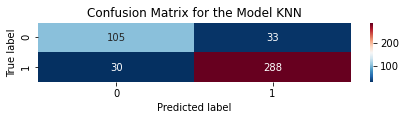

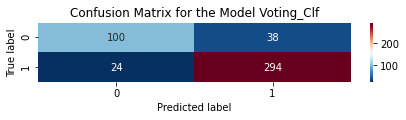

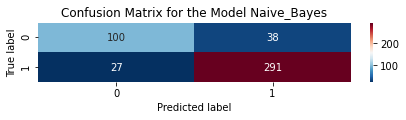

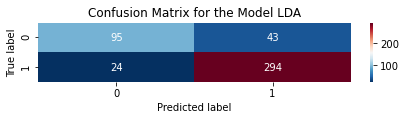

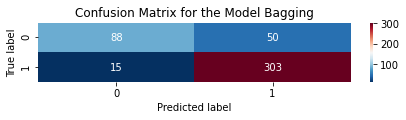

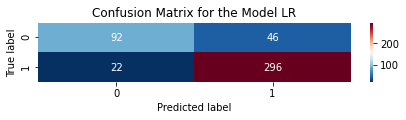

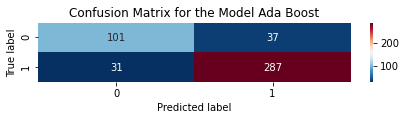

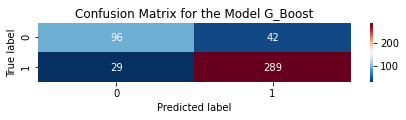

In [2495]:
Models = {Model_KNN: 'KNN',Voting_Classifier: 'Voting_Clf',Model_NB: 'Naive_Bayes',
          Model_LDA:'LDA',Model_Bagging:'Bagging',Model_LR:'LR',
          Model_ada_boost: 'Ada Boost',Model_G_boost:'G_Boost'}

for i in Models:
    plt.figure(figsize=(7,5))   
    plt.subplot(4,1,1)    
    plt.title('Confusion Matrix for the Model {}'. format(Models[i]))
    sns.heatmap((confusion_matrix(y_test,i.predict(x_test))),annot=True,fmt='.5g',cmap='RdBu_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [2494]:
Models = {Model_KNN: 'KNN',Voting_Classifier: 'Voting_Clf',Model_NB: 'Naive_Bayes',
          Model_LDA:'LDA',Model_Bagging:'Bagging',Model_LR:'LR',
          Model_ada_boost: 'Ada Boost',Model_G_boost:'G_Boost'}

for i in Models:
    print('\033[1m''Classification Report for {} model on Test Data''\033[0m'.format(Models[i]))
    print(classification_report(y_test,i.predict(x_test)))
    print('-----------------------------------------------------------------')

Classification Report for KNN model on Test Data
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       138
           1       0.90      0.91      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.83      0.84       456
weighted avg       0.86      0.86      0.86       456

-----------------------------------------------------------------
Classification Report for Voting_Clf model on Test Data
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       138
           1       0.89      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.85      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456

-----------------------------------------------------------------
Classification Report for Naive_Bayes model on Test Data
              precision    recall  f1-score   suppor

In [2396]:
# CV Scores of the Models with accuracy more than 84%
Models = {Model_KNN: 'KNN',Voting_Classifier: 'Voting_Clf',Model_NB: 'Naive_Bayes',
          Model_LDA:'LDA',Model_Bagging:'Bagging',Model_ada_boost:'A_Boost'}

print('\033[1m','CV Scores for the models with best accuracy scores','\033[0m')
print('---------------------------------------------------------')
for i in Models:
    Scores = cross_val_score(i, x_test, y_test, cv=5)
    print('CV scores for {} model'.format(Models[i]))
    print(Scores)
    print("")

 CV Scores for the models with best accuracy scores 
---------------------------------------------------------
CV scores for KNN model
[0.83695652 0.84615385 0.8021978  0.83516484 0.87912088]

CV scores for Voting_Clf model
[0.89130435 0.83516484 0.79120879 0.81318681 0.9010989 ]

CV scores for Naive_Bayes model
[0.86956522 0.81318681 0.8021978  0.83516484 0.89010989]

CV scores for LDA model
[0.88043478 0.83516484 0.8021978  0.81318681 0.91208791]

CV scores for Bagging model
[0.84782609 0.8021978  0.82417582 0.75824176 0.86813187]

CV scores for A_Boost model
[0.86956522 0.83516484 0.82417582 0.8021978  0.9010989 ]



 ROC Curve representation for the top models with accuracy more than 85%
----------------------------------------------------------------------
Area under the curve for Naive-Bayes Model is 0.912
Area under the curve for KNN Model is 0.897
Area under the curve for Bagging Model is 0.919
Area under the curve for LDA Model is 0.914
Area under the curve for A_boost Model is 0.912


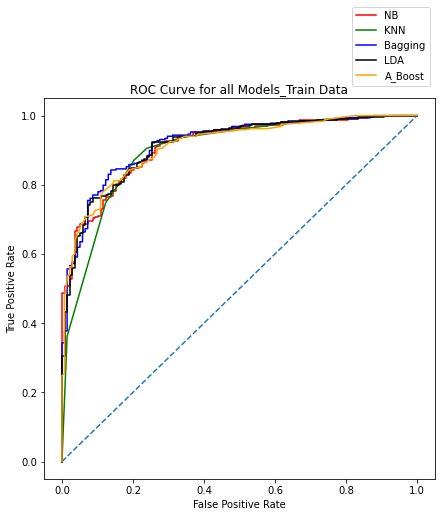

In [2397]:
print('\033[1m','ROC Curve representation for the top models with accuracy more than 85%''\033[0m')
print('----------------------------------------------------------------------')
print('Area under the curve for Naive-Bayes Model is',round(NB_Roc_Score_Test,3))
print('Area under the curve for KNN Model is',round(KNN_Roc_Score_Test,3))
print('Area under the curve for Bagging Model is',round(Bag_Roc_Score_Test,3))
print('Area under the curve for LDA Model is',round(LDA_Roc_Score_Test,3))
print('Area under the curve for A_boost Model is',round(ABoost_Roc_Score_Test,3))

fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test,pd.DataFrame(Model_NB.predict_proba(x_test)).iloc[:,1])
fpr_KN, tpr_KN, thresholds_KN = roc_curve(y_test,pd.DataFrame(Model_KNN.predict_proba(x_test)).iloc[:,1])
fpr_Bag, tpr_Bag, thresholds_Bag = roc_curve(y_test,pd.DataFrame(Model_Bagging.predict_proba(x_test)).iloc[:,1])
fpr_LDA, tpr_LDA, thresholds_LDA = roc_curve(y_test,pd.DataFrame(Model_LDA.predict_proba(x_test)).iloc[:,1])
fpr_AB, tpr_AB, thresholds_AB = roc_curve(y_test,pd.DataFrame(Model_ada_boost.predict_proba(x_test)).iloc[:,1])

plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(fpr_NB, tpr_NB,color='red',label="NB");
plt.plot(fpr_KN, tpr_KN,color='green',label="KNN");
plt.plot(fpr_Bag, tpr_Bag,color='blue',label="Bagging");
plt.plot(fpr_LDA, tpr_LDA,color='black',label="LDA");
plt.plot(fpr_AB, tpr_AB,color='orange',label="A_Boost");

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all Models_Train Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

In [1658]:
# Exporting the data:
X.to_csv('Election_X.csv')
y.to_csv('Election_y.csv')

#### SMOTE Outcome:

1. X and y data are exported to Project ML Q1 SMOTE file.
2. The data is analysed after implementing SMOTE technique (Over sampling as the target class is imbalanced)
3. Naive Bayes, KNN, Logistic regression, LDA and Bagging and Boosting are executed on the new data.
4. No accuracy improvements.
5. Hence, for further analysis we use the original data without SMOTE.

* P.S Please refer to 'Project ML Q1 SMOTE' codebook

In [2499]:
Model_Metric.sort_values(by=['Accuracy'],ascending=False)

,Accuracy,Roc_Score,F1_Score,Log_Loss
GBoost_Train,0.898209,0.955162,0.927807,3.515776
Voting_clf_Test,0.864035,0.000000,0.904615,4.696128
KNN_Test,0.861842,0.897400,0.901408,4.771862
NB_Test,0.857456,0.912497,0.899536,4.923357
Bag_Test,0.857456,0.919116,0.903130,4.923378
LDA_Test,0.853070,0.914365,0.897710,5.074852
LR_Test,0.850877,0.910901,0.896970,5.150600
ABoost_Test,0.850877,0.911950,0.894081,5.150584
Voting_clf_Train,0.844486,0.000000,0.890365,5.371324
GBoost_Test,0.844298,0.907529,0.890601,5.377822


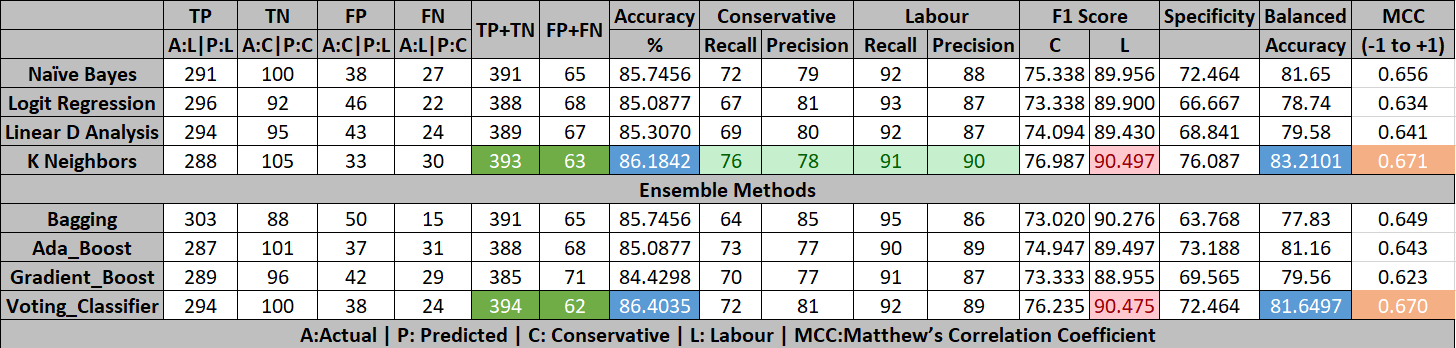

#### 1.8 Based on these predictions, what are the insights? (5 marks)

In [2519]:
Insights = pd.concat([X_test,y_test],axis=1)
Insights['Predictions'] = Voting_Pred
Insights.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote,Predictions
274,71,2,3,4,2,11,0,0,1,1
767,31,2,2,2,4,5,2,1,0,0
416,35,4,3,2,1,7,2,1,1,1
1033,34,4,4,4,2,7,0,0,1,1
507,40,3,4,4,2,7,3,1,1,1


#### Countplot for Actual and Predicted values:

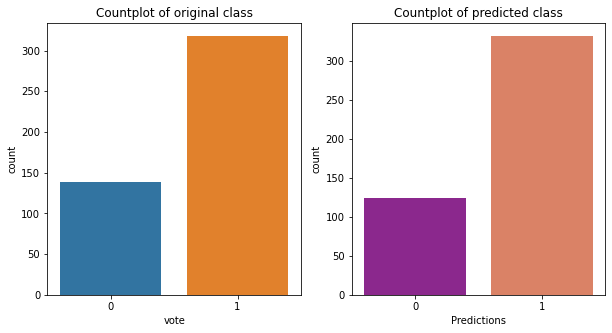

In [2520]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Countplot of original class')
sns.countplot(x=Insights['vote'],)
plt.subplot(1,2,2)
plt.title('Countplot of predicted class')
sns.countplot(x=Insights['Predictions'],palette='plasma')
plt.show()

#### Co-efficients for the variables from Logistic regression and LDA model:

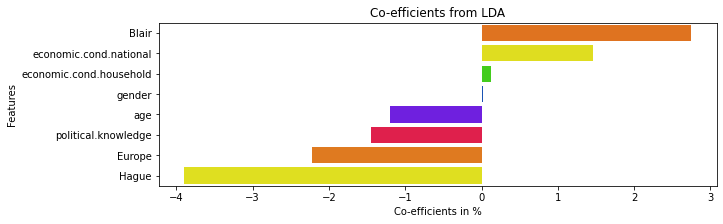

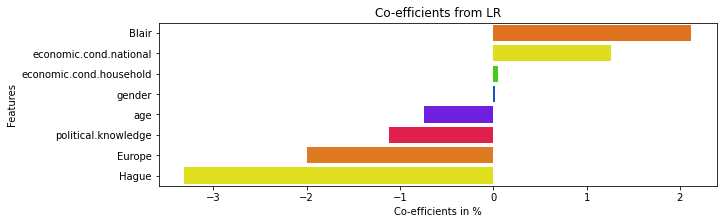

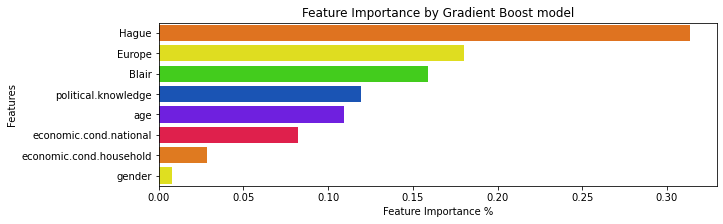

In [2529]:
x1=pd.DataFrame(Model_LDA.coef_.ravel(),index=x_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(10,3))
sns.barplot(x=x1[0],y=x1.index,palette='prism')
plt.xlabel('Co-efficients in %')
plt.ylabel('Features')
plt.title('Co-efficients from LDA')
x1=pd.DataFrame(Model_LR.coef_.ravel(),index=x_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(10,3))
sns.barplot(x=x1[0],y=x1.index,palette='prism')
plt.xlabel('Co-efficients in %')
plt.ylabel('Features')
plt.title('Co-efficients from LR')
# Model_G_boost.feature_importances_
x1=pd.DataFrame(Model_G_boost.feature_importances_.ravel(),index=x_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(10,3))
sns.barplot(x=x1[0],y=x1.index,palette='prism')
plt.xlabel('Feature Importance %')
plt.ylabel('Features')
plt.title('Feature Importance by Gradient Boost model')
plt.show()

In [2530]:
from sklearn.tree import export_graphviz
train_char_label = ['Conservative','Labour']
small_rf_rev = RandomForestClassifier(n_estimators = 300,random_state=1,max_depth=3,
                                  max_features='auto',min_samples_split=45,min_samples_leaf=15)
small_rf_rev.fit(x_train,y_train)
tree_rev = small_rf_rev.estimators_[10]

In [2537]:
RF_tree_rev = open('RF_Tree_File2.dot','w')
dot_data1 = export_graphviz(tree_rev, 
                out_file='RF_Tree_File2.dot', 
                feature_names = list(x_train), 
                class_names = list(train_char_label),
                rounded = True, proportion = False, 
                precision = 2, filled = True)
RF_tree_rev.close()
print('Random tree from the Random forest model')

Random tree from the Random forest model


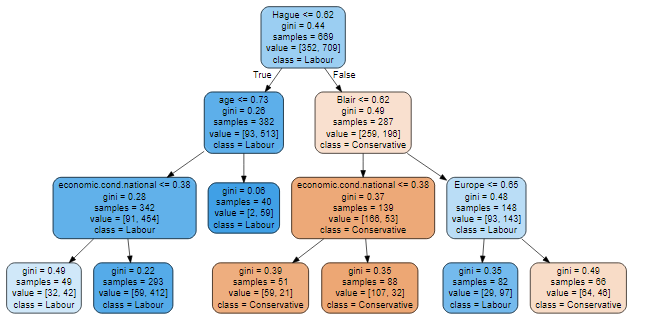

#### Analysis based on the Classification metrics:

In [2532]:
Negative = Insights[Insights['vote'] == 0]
Positive = Insights[Insights['vote'] == 1]

A_Cons_P_Labour = Negative[Negative['Predictions'] ==1]
A_Cons_P_Cons = Negative[Negative['Predictions'] ==0]
A_Labour_P_Labour = Positive[Positive['Predictions'] ==1]
A_Labour_P_Cons = Positive[Positive['Predictions'] ==0]

#### Important variables are:
1. Blair, Economic condition national, Hague, Europe, age and political knowledge

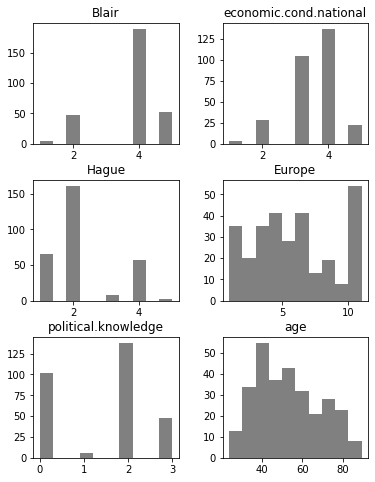

In [2533]:
# Actual class: Labour | Predicted: Labour
# True Positive

A_Labour_P_Labour[['Blair','economic.cond.national',
                'Hague','Europe','political.knowledge','age']].hist(figsize=(6,8),grid=False,color='grey');

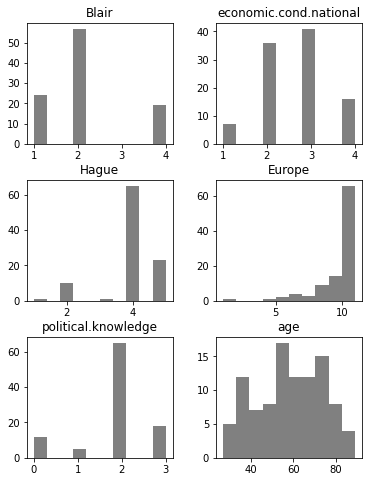

In [2534]:
# Actual class: Conservative | Predicted: Conservative
# True Negative
A_Cons_P_Cons[['Blair','economic.cond.national',
                'Hague','Europe','political.knowledge','age']].hist(figsize=(6,8),grid=False,color='grey');

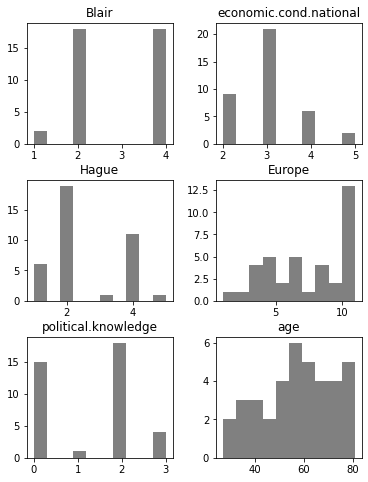

In [2535]:
# Actual class: Conservative | Predicted: Labour
# False Positive

A_Cons_P_Labour[['Blair','economic.cond.national',
                'Hague','Europe','political.knowledge','age']].hist(figsize=(6,8),grid=False,color='grey');

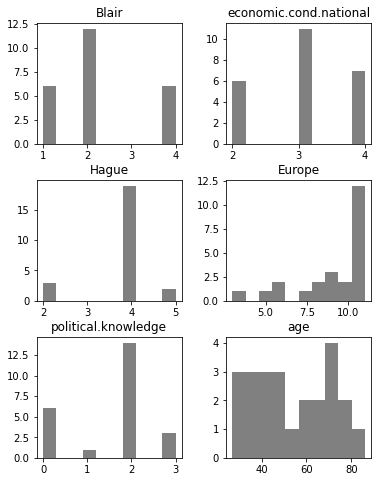

In [2536]:
# Actual class: Labour | Predicted: Conservative
# False Negative

A_Labour_P_Cons[['Blair','economic.cond.national',
                'Hague','Europe','political.knowledge','age']].hist(figsize=(6,8),grid=False,color='grey');

#### Insights:
1.	A voter with high ratings for Tony Blair and low ratings for William Hague votes for Labour party.
2.	A voter with high ratings for William Hague and low ratings for Tony Blair votes for Conservative party.
3.	Voters with Eurosceptic attitude prefer Conservative party. They do not have neutral opinion towards the integration.
4.	Voters of Labour party believe in good national economic conditions.
5.	The median age of the voters of conservative party are higher than voters of labour party. From this we can infer that, people who are aged prefer conservative party.
#### Conclusion:
With a data set of 1525 voters and 9 variables, different models like Naïve Bayes, K nearest neighbors, Logistic regression and Linear discriminant analysis are executed. The ensemble methods like Bagging, Boosting and Voting classifiers are used to get Bias-Variance trade off. The models which are over fitted and the models which had low accuracy scores are tuned using the Gird search parameters. The performance of the models improved after applying Grid search. The best or optimized model for this problem statement is K nearest neighbor with n_neighbors =11 and Naïve Bayes model. The predictions from all the models are combined using the Voting Classifier and the best predictions are calculated using ‘soft’ voting technique. On analysing the predictions and the actual results, high and low ratings for William Hague, Tony Blair, Europe and Political knowledge are the key predictors.


### END